## Importing the Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
df = pd.read_csv('Students Performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Value counts for seeing if any errors in the columns like any anamolies or any other issues

In [5]:
print(df['gender'].value_counts())
print('\n')
print(df['parental level of education'].value_counts())
print('\n')
print(df['race/ethnicity'].value_counts())
print('\n')
print(df['lunch'].value_counts())
print('\n')
print(df['test preparation course'].value_counts())
print('\n')

gender
female    518
male      482
Name: count, dtype: int64


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course
none         642
completed    358
Name: count, dtype: int64




In [6]:
df["test preparation course"] = df["test preparation course"].replace({
    "none": "not completed",
    "completed": "completed"
})

In [7]:
print(df['gender'].dtype)
print(df['parental level of education'].dtype)
print(df['race/ethnicity'].dtype)
print(df['lunch'].dtype)
print(df['test preparation course'].dtype)
print(df['math score'].dtype)
print(df['reading score'].dtype)
print(df['writing score'].dtype)

object
object
object
object
object
int64
int64
int64


# Given figure size and DPI in the question

In [8]:
figsize = (800/300), (600/300)
dpi = 300

## V1

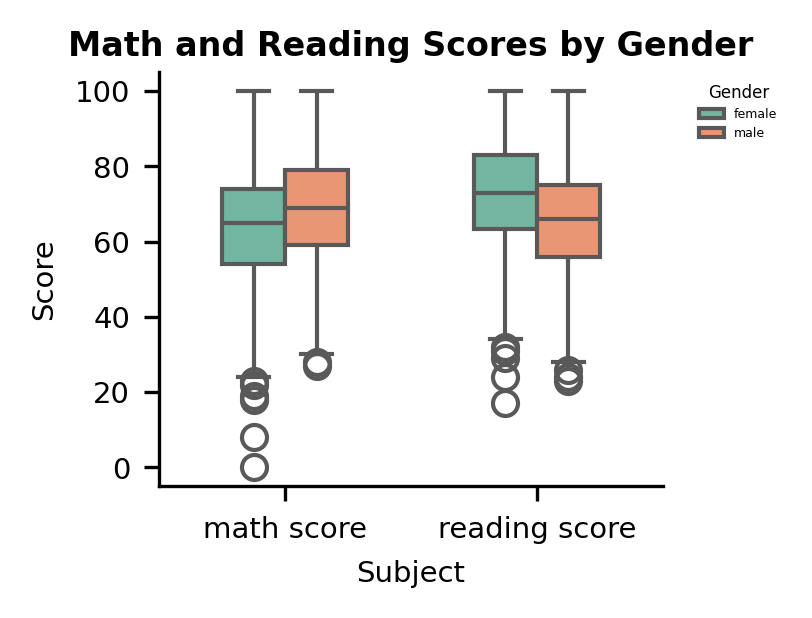

In [ ]:
df_melted = df.melt(
    id_vars=['gender'],
    value_vars=['math score', 'reading score'],
    var_name="Subject",
    value_name="Score"
)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

sns.boxplot(
    x='Subject',
    y="Score",
    hue="gender",  # Change hue to gender
    data=df_melted,
    palette="Set2",
    width=0.5,
    ax=ax
)

ax.set_title("Math and Reading Scores by Gender", fontsize=8, weight="bold", pad=4)
ax.set_xlabel("Subject", fontsize=7)  # Change xlabel to Subject
ax.set_ylabel("Score", fontsize=7)


ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)


ax.legend(
    title="Gender", # Change legend title to Gender
    fontsize=3, title_fontsize=4,
    frameon=False,
    loc="upper left", bbox_to_anchor=(1.05, 1)
)

sns.despine()
plt.tight_layout(pad=0.5)

plt.savefig("scores_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()

In Math Scores males exhibit slightly higher median math scores compared to females. The distribution also shows that males tend to achieve both higher maximum scores and higher minimum scores, indicating stronger performance across the range. Females, on the other hand, display a wider spread with more low-end outliers, suggesting greater variability in performance.

Whereas coming to Reading Scores the trend reverses in reading,i.e.females outperform males on average and females have a higher median score and a wider interquartile range (IQR) skewed towards higher values, showing that many achieve top-end performance. However, females also display some of the lowest outliers, pulling their minimum scores below those of males, While, in males reading scores are more tightly distributed, but generally lower than females at the top end.

## V2

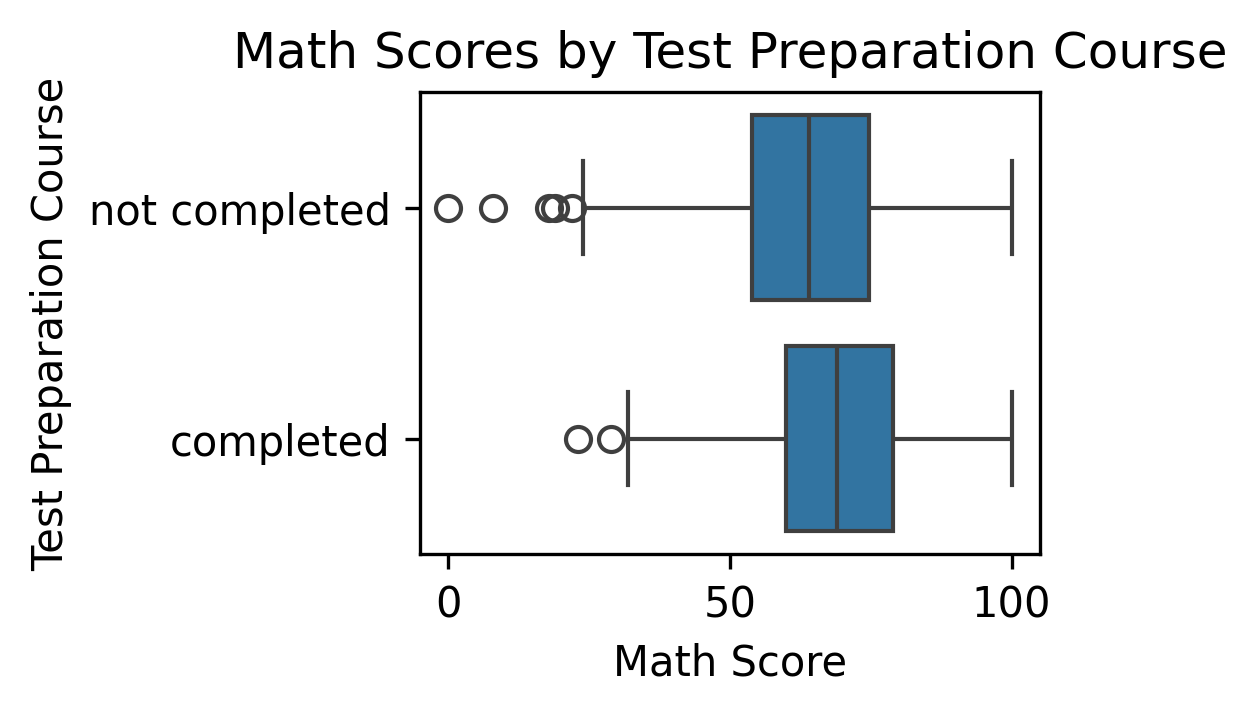

In [ ]:
plt.figure(figsize=figsize, dpi=dpi)

sns.boxplot(x='math score', y='test preparation course', data=df)
plt.title("Math Scores by Test Preparation Course")
plt.xlabel("Math Score")
plt.ylabel("Test Preparation Course")
plt.show()

The boxplot analysis shows a clear and substantial benefit of completing the test preparation course on math performance. Students who completed the course achieved a much higher median score compared to those who did not, making a improvement in central performance. Their scores are also more tightly clustered, indicating greater consistency at a higher level of achievement. In contrast, non-completers displayed both a lower median and a wider score spread, with the majority falling between the lowest score than the ones completed ones. This highlights not only weaker overall performance but also less predictability in outcomes.

## V3

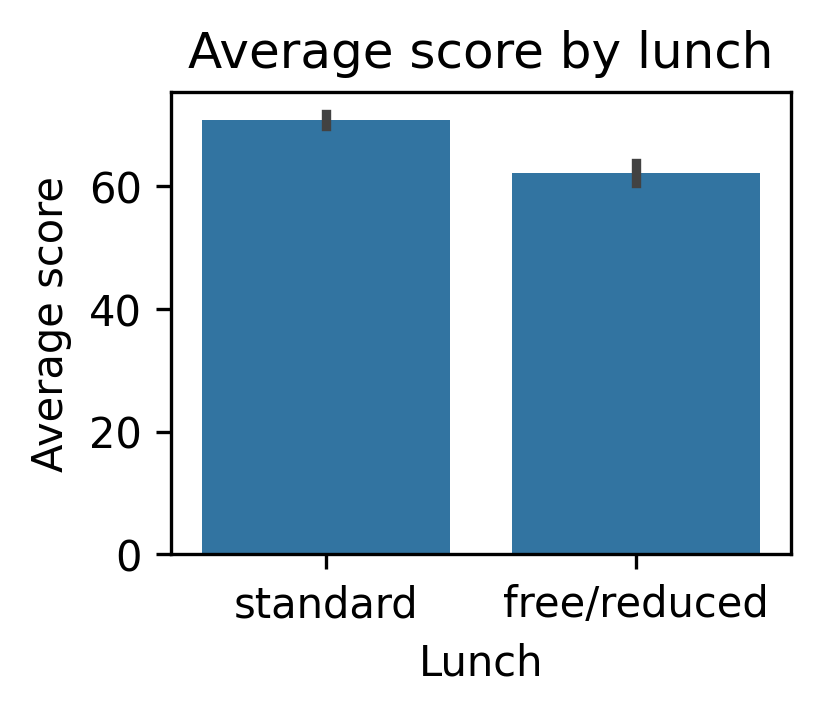

In [ ]:
df2 = df.copy()
df2['Avg_score'] = df2[['math score', 'reading score', 'writing score']].mean(axis=1)
df2['Avg_score'] = df2['Avg_score'].round(2)


plt.figure(figsize=figsize, dpi=300)

sns.barplot(x = 'lunch', y= 'Avg_score', data=df2)
plt.title("Average score by lunch")
plt.xlabel("Lunch")
plt.ylabel("Average score")
plt.show()

Looking at the we can evidently notice that students average scores(mean of all the scores combined) are higher who had been provided standard lunch than that of the ones of free/reduced ones.


## V4

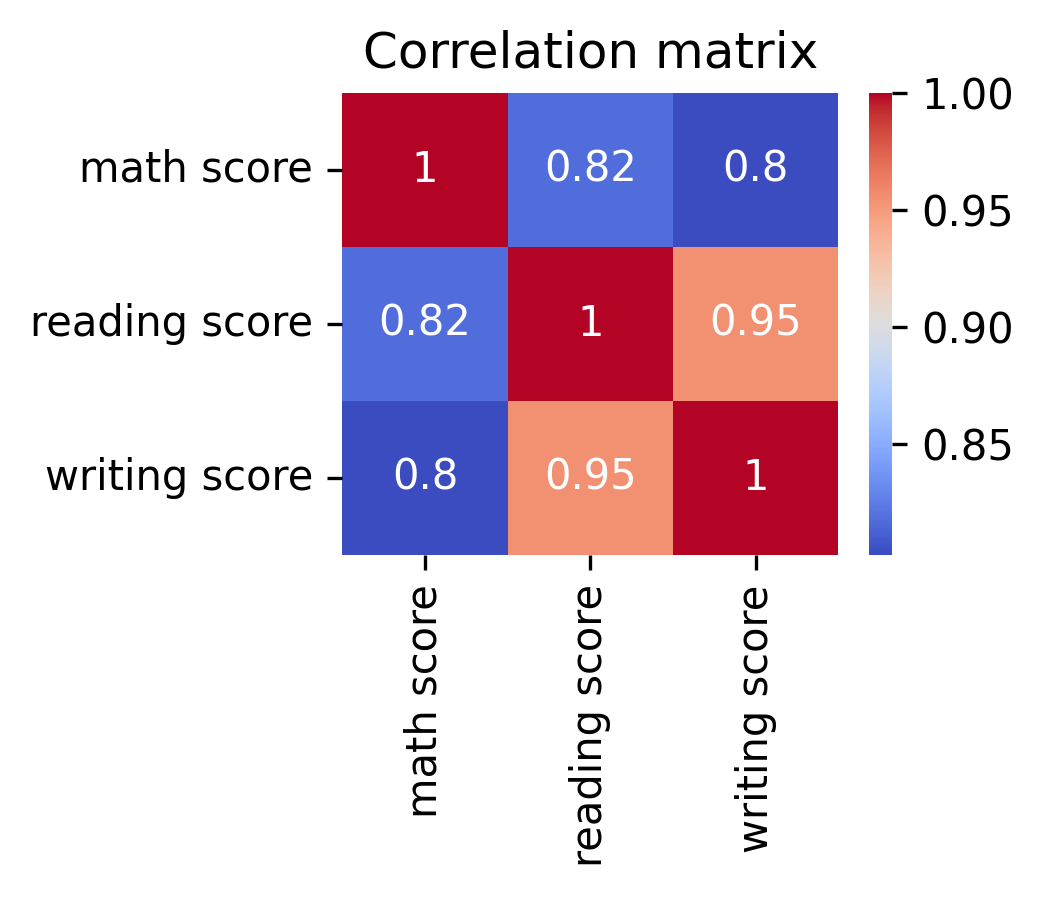

In [ ]:
plt.figure(figsize=figsize, dpi=300)

corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

The correlation matrix highlights strong positive associations among math, reading, and writing scores, with coefficients ranging from 0.80 to 0.95. This indicates that students who excel in one subject are highly likely to perform well in others, reflecting a strong underlying general academic ability.

Math, while still highly correlated with reading (r = 0.82) and writing (r = 0.80), emerges as the most distinct domain. This slightly weaker relationship suggests that math incorporates additional domain-specific skills such as abstract reasoning, numerical fluency, and quantitative problem-solving.

#

## V5

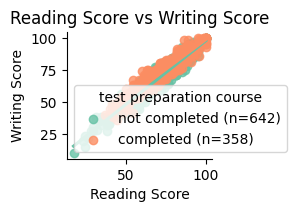

In [ ]:
g = sns.lmplot(
    x="reading score",
    y="writing score",
    data=df,
    hue="test preparation course",
    height = 600 / 300 ,
    aspect = (800 / 300) / (600 / 300),
    palette="Set2",
)

# Title and labels
g.set_axis_labels("Reading Score", "Writing Score")
plt.title("Reading Score vs Writing Score")

# Build mapping for legend labels with counts
counts = df["test preparation course"].value_counts()
label_map = {
    "not completed": f"not completed (n={counts['not completed']})",
    "completed": f"completed (n={counts['completed']})"
}

# Remove the default seaborn legend
g._legend.remove()

# Add custom legend
handles, labels = g.axes[0,0].get_legend_handles_labels()
new_labels = [label_map[label] for label in labels]
plt.legend(handles, new_labels, title="test preparation course")

plt.show()


Strength of association (Math vs Reading):

The Scatter Plot shows strong positive linear relationship between reading and writing scores.So,the students who perform well in reading also perform well in writing.

When considering the effect of test preparation, the slopes of the regression lines for completers and non-completers are nearly identical, showing that the underlying relationship between reading and writing remains consistent regardless of test prep. However, the slightly higher intercept for course completers suggests a consistent advantage: at any given level of reading proficiency, students who completed the course tend to achieve marginally higher writing scores.